In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification

#initialize parameters
learning_rate_1 = 0.01
#Create dataset
X, y = make_classification(n_samples=500, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1,
                           flip_y=0.1,  # adds a small amount of noise
                           class_sep=1.0,  # classes are separable but not too easily
                           random_state=40)
                           
#relabel the Y targets to 1/-1
y = np.where(y == 0, -1, y)
#Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104,test_size=0.25,shuffle=True)

#3Implement soft margin svm. Compute the loss function
def hinge_loss (x_1, y_1,w,b,c):
    margin = 1 - y_1 * (np.dot(w, x_1) + b)
    hinge = max(0, margin)
    return 0.5 * np.dot(w, w) + c * hinge

def gradient_w (w,b,x_1,y_1,c) :
    if y_1 * (np.dot(w, x_1) + b) < 1:
        return w - c * y_1 * x_1  # Misclassified or within margin
    else:
        return w  # Correctly classified, no update


def gradient_b(w,b,x_1,y_1): 
    if y_1 * (np.dot(w, x_1) + b) < 1:
        return -c * y_1  # Misclassified or within margin
    else:
        return 0  # Correctly classified, no update

#3.Implement soft margin SVM
def gradient_b(w, b, x_1, y_1, c):
    if y_1 * (np.dot(w, x_1) + b) < 1:
        return -c * y_1  # Misclassified or within margin
    else:
        return 0  # Correctly classified, no update


In [2]:
# Implement soft margin SVM with mini-batch gradient descent
def svm_mini_batch_gradient(X_train, y_train, c, lr, epochs, batch_size):
    # Initialize weights and bias
    w = np.zeros(X_train.shape[1])
    b = 0
    n = X_train.shape[0]  # Number of samples
    hinge_list = []
    
    # Perform gradient descent for each epoch
    for epoch in range(epochs):
        # Shuffle the data at the start of each epoch
        indices = np.random.permutation(n)
        X_shuffled = X_train[indices]
        y_shuffled = y_train[indices]
        
        # Iterate through mini-batches
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            
            # Initialize gradients
            dw = np.zeros(X_train.shape[1])
            db = 0
            
            # Compute the gradients for the mini-batch
            for x_1, y_1 in zip(X_batch, y_batch):
                dw += gradient_w(w, b, x_1, y_1, c)
                db += gradient_b(w, b, x_1, y_1, c)
            
            # Update weights and bias
            w -= lr * dw / batch_size
            b -= lr * db / batch_size
        
        # Calculate loss after each epoch
        epoch_loss = np.mean([hinge_loss(x, y, w, b, c) for x, y in zip(X_train, y_train)])
        hinge_list.append(epoch_loss)
        #print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}")
    
    return w, b, hinge_list


In [3]:
#4.Use mini batch gradient descent to minimize the loss function on the next page (shuffle the data first)
#5.Return the optimal weights by minimizing the loss function

#6.Perform some predictions on the test data
C = 1.0  # Regularization parameter
learning_rate_2 = 0.01
epochs_trial = 100
batch_size = 32

Weight, Bias, losses = svm_mini_batch_gradient(X_train, y_train, C, learning_rate_2, epochs_trial, batch_size)

def predict(x_2, w_1, b_1):
    return np.sign(np.dot(x_2, w_1) + b_1)

y_predict = predict(X_test, Weight, Bias)

In [4]:

# Step 7: Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.20%


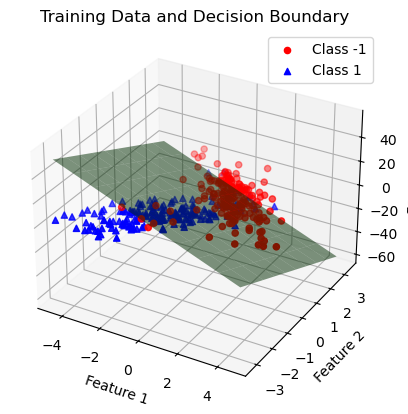

In [5]:

#8.Visualize the training data and decision boundary in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot points for class -1
ax.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], X_train[y_train == -1][:, 2], 
           color='red', label='Class -1', marker='o')
# Plot points for class 1
ax.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], X_train[y_train == 1][:, 2], 
           color='blue', label='Class 1', marker='^')

# Plot the decision boundary
x1 = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 10)
x2 = np.linspace(np.min(X_train[:, 1]), np.max(X_train[:, 1]), 10)
x1, x2 = np.meshgrid(x1, x2)

# Calculate x3 based on the decision boundary equation w_1 * x_1 + w_2 * x_2 + w_3 * x_3 + b = 0
x3 = (-Weight[0] * x1 - Weight[1] * x2 - Bias) / Weight[2]

# Plot the decision boundary
ax.plot_surface(x1, x2, x3, color='green', alpha=0.5)

# Labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Training Data and Decision Boundary')
ax.legend()

plt.show()

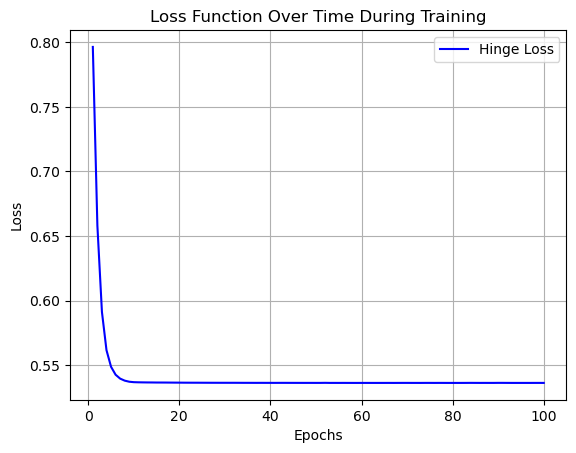

In [6]:
#9.Visualize the loss function over time during training
plt.figure()
plt.plot(range(1, len(losses) + 1), losses, color='blue', label='Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Over Time During Training')
plt.grid(True)
plt.legend()
plt.show()